<a href="https://colab.research.google.com/github/dilanurlaila/dilanurlaila/blob/main/Proyek_Analisis_Data_Dila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing
- **Nama:** Dila Nurlaila
- **Email:** Dilanurlaila@gmail.com
- **ID Dicoding:** L429XWD042



## Menentukan Pertanyaan Bisnis

1.   Bagaimana distribusi jumlah penyewaan berdasarkan bulan dan musim?
2.   Bagaimana tren penyewaan sepeda dari waktu ke waktu?


## Import Semua Packages/Library yang Digunakan

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Data Wrangling

In [ ]:
from collections import UserList
files = [ ("1ypJQFLA6ouY3uiKCKyvVXQa9ywMmKUeB", "day.csv"),
            ("15bw_MFcaXJysB5nZgmVfMFgAuIoPMBM4", "hour.csv")
           ]

for file_id, file_name in files:
  url = f'https://drive.google.com/uc?id={file_id}'
  gdown.download(id=file_id, output=file_name, quiet=False)

df_list = [pd.read_csv(file_name) for _, file_name in files]


Downloading...
From: https://drive.google.com/uc?id=1ypJQFLA6ouY3uiKCKyvVXQa9ywMmKUeB
To: /content/day.csv
100%|██████████| 57.6k/57.6k [00:00<00:00, 6.89MB/s]
Downloading...
From: https://drive.google.com/uc?id=15bw_MFcaXJysB5nZgmVfMFgAuIoPMBM4
To: /content/hour.csv
100%|██████████| 1.16M/1.16M [00:00<00:00, 13.4MB/s]


### Gathering Data

In [ ]:
day_df = df_list[0]
print(day_df.head())

hour_df = df_list[1]
print(hour_df.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant      dteday  se

In [ ]:
print(day_df.info())
print(hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns

**Insight:**
- cek tipe data, cek duplikasi, cek isna

### Assessing Data

assesing day dataframe


In [ ]:
day_df.dtypes

,0
instant,int64
dteday,object
season,int64
yr,int64
mnth,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64
temp,float64


In [ ]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
print(day_df.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


In [ ]:
print(day_df.isna().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [ ]:
print("Jumlah Duplikasi :", day_df.duplicated().sum())

Jumlah Duplikasi : 0


In [ ]:
print(day_df.describe())

          instant               dteday      season          yr        mnth  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    2.496580    0.500684    6.519836   
min      1.000000  2011-01-01 00:00:00    1.000000    0.000000    1.000000   
25%    183.500000  2011-07-02 12:00:00    2.000000    0.000000    4.000000   
50%    366.000000  2012-01-01 00:00:00    3.000000    1.000000    7.000000   
75%    548.500000  2012-07-01 12:00:00    3.000000    1.000000   10.000000   
max    731.000000  2012-12-31 00:00:00    4.000000    1.000000   12.000000   
std    211.165812                  NaN    1.110807    0.500342    3.451913   

          holiday     weekday  workingday  weathersit        temp       atemp  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.028728    2.997264    0.683995    1.395349    0.495385    0.474354   
min      0.000000    0.000000    0.000000    1.000000 

**Insight**

1.   Kolom *hum* memiliki nilai minimum 0, apakah benar ada hari tanpa kelembapan sama sekali ?

2.   Kolom *windspeed* memiliki nilai minimum sangat kecil (0.022) yang berarti tidak ada angin sama sekali bisa terjadi, perlu dicek apakah ada banyak nilai 0 atau nilai sangat kecil

3. Kolom *cnt* (total penyewa) berkisar antara 22 hingga 8714, dimana ada perbedaan antara nilai min dan max cukup besar,







In [ ]:
day_df.nunique()

,0
instant,731
dteday,731
season,4
yr,2
mnth,12
holiday,2
weekday,7
workingday,2
weathersit,3
temp,499


In [ ]:
day_df[day_df['hum']==0]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
68,69,2011-03-10,1,0,3,0,4,1,3,0.389091,0.385668,0.0,0.261877,46,577,623


In [ ]:
print(day_df[day_df['windspeed'] <0.05])
day_df[day_df['windspeed'] < 0.05].shape

     instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
37        38 2011-02-07       1   0     2        0        1           1   
279      280 2011-10-07       4   0    10        0        5           1   
280      281 2011-10-08       4   0    10        0        6           0   
282      283 2011-10-10       4   0    10        1        1           0   
355      356 2011-12-22       1   0    12        0        4           1   
695      696 2012-11-26       4   1    11        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
37            1  0.271667  0.303658  0.738333   0.045408     120        1592   
279           1  0.510833  0.504404  0.684167   0.022392     949        4036   
280           1  0.521667  0.513242  0.701250   0.045404    2235        3174   
282           1  0.570833  0.542925  0.733750   0.042304    1514        3603   
355           2  0.423333  0.426121  0.757500   0.047275     227        28

(6, 16)

In [ ]:
print(day_df.shape)

(731, 16)


In [ ]:
print(day_df.drop(columns=['dteday']).corr())

             instant    season        yr      mnth   holiday   weekday  \
instant     1.000000  0.412224  0.866025  0.496702  0.016145 -0.000016   
season      0.412224  1.000000 -0.001844  0.831440 -0.010537 -0.003080   
yr          0.866025 -0.001844  1.000000 -0.001792  0.007954 -0.005461   
mnth        0.496702  0.831440 -0.001792  1.000000  0.019191  0.009509   
holiday     0.016145 -0.010537  0.007954  0.019191  1.000000 -0.101960   
weekday    -0.000016 -0.003080 -0.005461  0.009509 -0.101960  1.000000   
workingday -0.004337  0.012485 -0.002013 -0.005901 -0.253023  0.035790   
weathersit -0.021477  0.019211 -0.048727  0.043528 -0.034627  0.031087   
temp        0.150580  0.334315  0.047604  0.220205 -0.028556 -0.000170   
atemp       0.152638  0.342876  0.046106  0.227459 -0.032507 -0.007537   
hum         0.016375  0.205445 -0.110651  0.222204 -0.015937 -0.052232   
windspeed  -0.112620 -0.229046 -0.011817 -0.207502  0.006292  0.014282   
casual      0.275255  0.210399  0.2485

<Axes: >

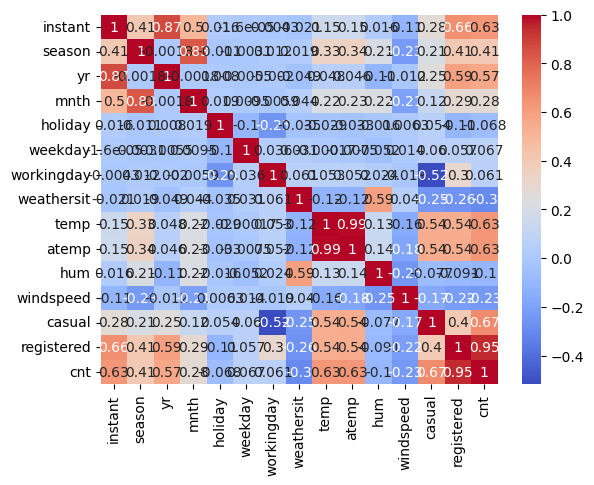

In [ ]:
sns.heatmap(day_df.drop(columns=['dteday']).corr(), annot=True, cmap='coolwarm')

<Axes: xlabel='cnt', ylabel='Count'>

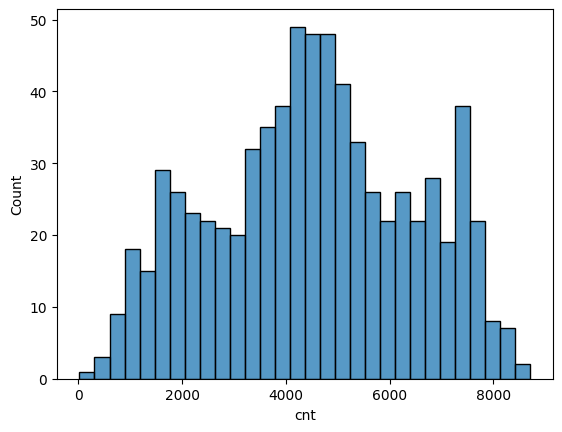

In [ ]:
sns.histplot(day_df['cnt'], bins = 30)

<Axes: xlabel='cnt'>

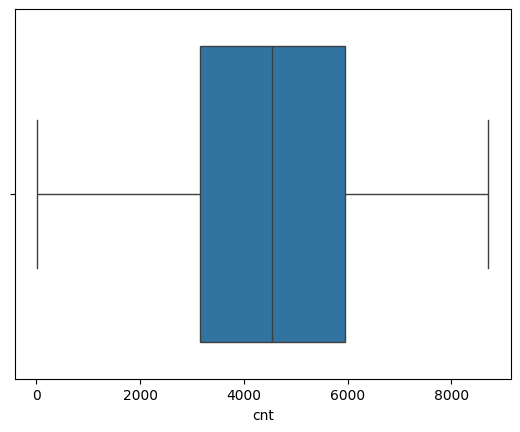

In [ ]:
sns.boxplot(x=day_df['cnt'])

In [ ]:
backup_df = day_df.copy()

assesing hour dataframe


In [ ]:
hour_df.dtypes

,0
instant,int64
dteday,object
season,int64
yr,int64
mnth,int64
hr,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64


In [ ]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [ ]:
print(hour_df.isnull().sum())

print("Jumlah Duplikasi :", hour_df.duplicated().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Jumlah Duplikasi : 0


In [ ]:
hour_df['dteday_num'] = (hour_df['dteday'] - hour_df['dteday'].min()).dt.days
print(hour_df[['dteday_num']].describe())

         dteday_num
count  17379.000000
mean     366.172622
std      210.072051
min        0.000000
25%      184.000000
50%      366.000000
75%      548.000000
max      730.000000


In [ ]:
hour_df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


In [ ]:
hour_df.nunique()

,0
instant,17379
dteday,731
season,4
yr,2
mnth,12
hr,24
holiday,2
weekday,7
workingday,2
weathersit,4


In [ ]:
print(hour_df.isna().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dteday_num    0
dtype: int64


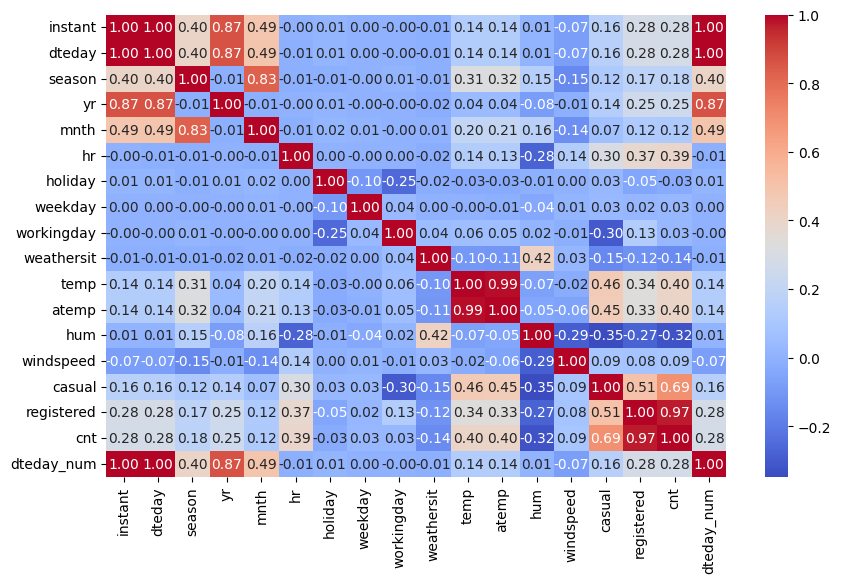

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(hour_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

<Axes: xlabel='cnt', ylabel='Count'>

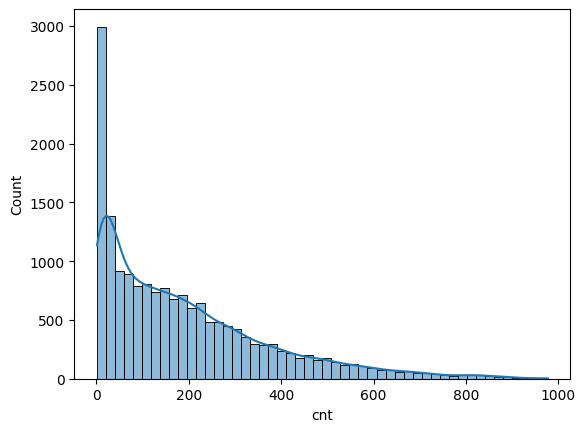

In [ ]:
sns.histplot(hour_df['cnt'], bins=50, kde=True)

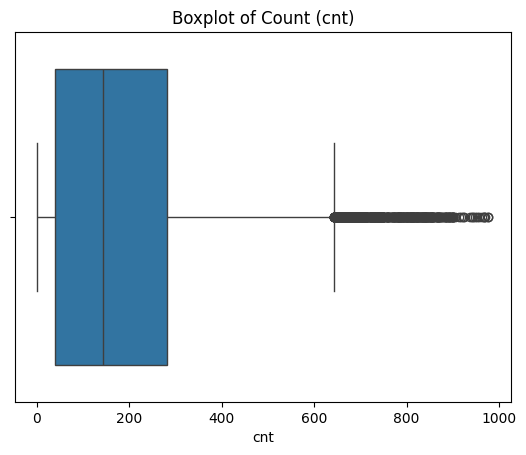

In [ ]:
sns.boxplot(x=hour_df['cnt'])
plt.title("Boxplot of Count (cnt)")
plt.show()

### Cleaning Data

**Insight:**


1.   Menghapus Kolom Instant
2.   Cek outlier di kolom Windspeed
3. korelasi cnt dengan holiday negatif



In [ ]:
day_df.drop(columns = ['instant'], inplace=True)

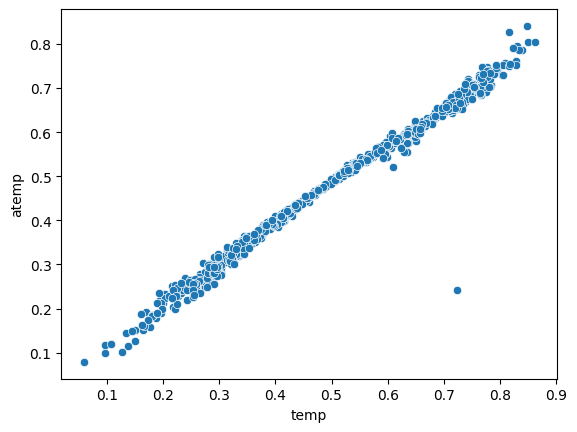

           temp     atemp
temp   1.000000  0.991702
atemp  0.991702  1.000000


In [ ]:
sns.scatterplot(x=day_df['temp'], y=day_df['atemp'])
plt.show()

# Cek korelasi numeriknya
corr = day_df[['temp', 'atemp']].corr()
print(corr)

In [ ]:
day_df.drop(columns=['atemp'], inplace=True)

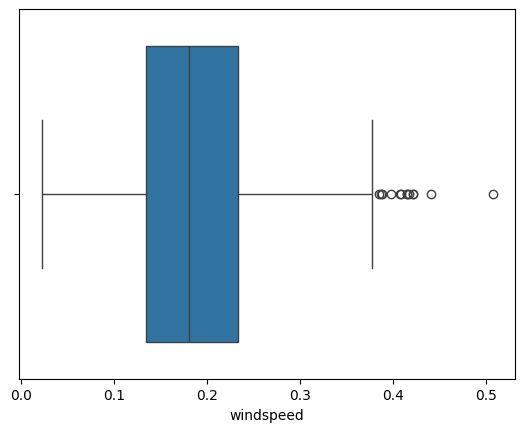

In [ ]:
sns.boxplot(x=day_df['windspeed'])
plt.show()

In [ ]:
print(day_df['windspeed'].describe())

count    731.000000
mean       0.190486
std        0.077498
min        0.022392
25%        0.134950
50%        0.180975
75%        0.233214
max        0.507463
Name: windspeed, dtype: float64


In [ ]:
Q1 = day_df['windspeed'].quantile(0.25)
Q3 = day_df['windspeed'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

day_df = day_df[(day_df['windspeed'] >= lower_bound) & (day_df['windspeed'] <= upper_bound)]


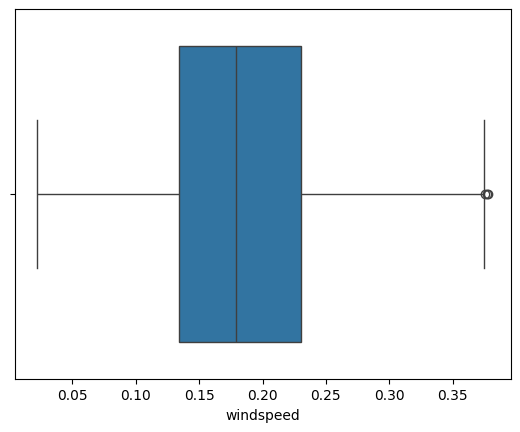

In [ ]:
sns.boxplot(x=day_df['windspeed'])
plt.show()

In [ ]:
Q1 = day_df['windspeed'].quantile(0.25)
Q3 = day_df['windspeed'].quantile(0.75)
IQR = Q3 - Q1

batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

print(day_df[(day_df['windspeed'] < batas_bawah) | (day_df['windspeed'] > batas_atas)])


        dteday  season  yr  mnth  holiday  weekday  workingday  weathersit  \
238 2011-08-27       3   0     8        0        6           0           2   
377 2012-01-13       1   1     1        0        5           1           1   
693 2012-11-24       4   1    11        0        6           0           1   

         temp       hum  windspeed  casual  registered   cnt  
238  0.680000  0.850000   0.375617     226         889  1115  
377  0.274167  0.507500   0.378108     174        3040  3214  
693  0.278333  0.404583   0.376871     532        1745  2277  


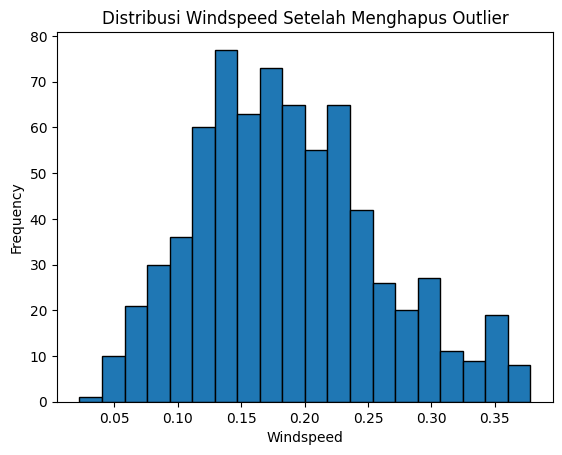

In [ ]:
plt.hist(day_df['windspeed'], bins=20, edgecolor='black')
plt.xlabel('Windspeed')
plt.ylabel('Frequency')
plt.title('Distribusi Windspeed Setelah Menghapus Outlier')
plt.show()


In [ ]:
print(day_df['windspeed'].describe())


count    718.000000
mean       0.186392
std        0.071791
min        0.022392
25%        0.134331
50%        0.178802
75%        0.230724
max        0.378108
Name: windspeed, dtype: float64


In [ ]:
print(day_df.info())
print(day_df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 718 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      718 non-null    datetime64[ns]
 1   season      718 non-null    int64         
 2   yr          718 non-null    int64         
 3   mnth        718 non-null    int64         
 4   holiday     718 non-null    int64         
 5   weekday     718 non-null    int64         
 6   workingday  718 non-null    int64         
 7   weathersit  718 non-null    int64         
 8   temp        718 non-null    float64       
 9   hum         718 non-null    float64       
 10  windspeed   718 non-null    float64       
 11  casual      718 non-null    int64         
 12  registered  718 non-null    int64         
 13  cnt         718 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(10)
memory usage: 84.1 KB
None
      dteday  season  yr  mnth  holiday  weekday  workin

In [ ]:
hour_df.drop(columns=['instant'], inplace=True)

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   yr          17379 non-null  int64         
 3   mnth        17379 non-null  int64         
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  int64         
 7   workingday  17379 non-null  int64         
 8   weathersit  17379 non-null  int64         
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  cnt         17379 non-null  int64         
 16  dteday_num  17379 non-

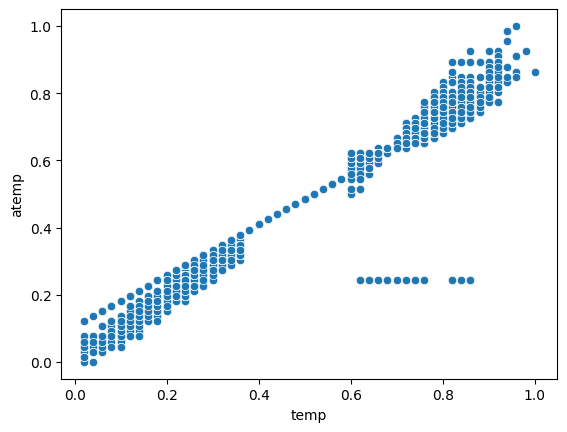

           temp     atemp
temp   1.000000  0.987672
atemp  0.987672  1.000000


In [ ]:
sns.scatterplot(x=hour_df['temp'], y=hour_df['atemp'])
plt.show()

# Cek korelasi numerik
corr = hour_df[['temp', 'atemp']].corr()
print(corr)

In [ ]:
hour_df.drop(columns=['atemp'], inplace=True)

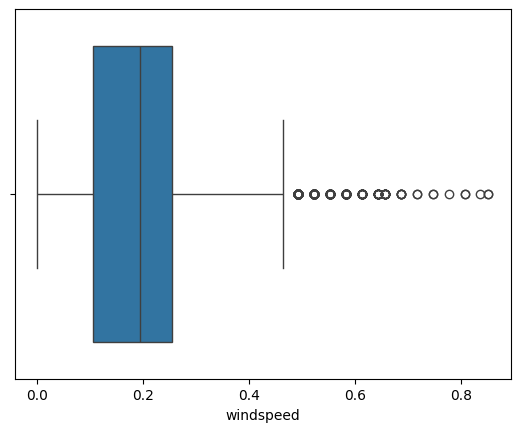

count    17379.000000
mean         0.190098
std          0.122340
min          0.000000
25%          0.104500
50%          0.194000
75%          0.253700
max          0.850700
Name: windspeed, dtype: float64


In [ ]:
sns.boxplot(x=hour_df['windspeed'])
plt.show()

print(hour_df['windspeed'].describe())

In [ ]:
# Hitung batas outlier dengan IQR
Q1 = hour_df['windspeed'].quantile(0.25)
Q3 = hour_df['windspeed'].quantile(0.75)
IQR = Q3 - Q1

# Hitung batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Hapus outlier
hour_df = hour_df[(hour_df['windspeed'] >= lower_bound) & (hour_df['windspeed'] <= upper_bound)]


In [ ]:
print(hour_df['windspeed'].describe())

count    17037.000000
mean         0.182893
std          0.111995
min          0.000000
25%          0.104500
50%          0.164200
75%          0.253700
max          0.462700
Name: windspeed, dtype: float64


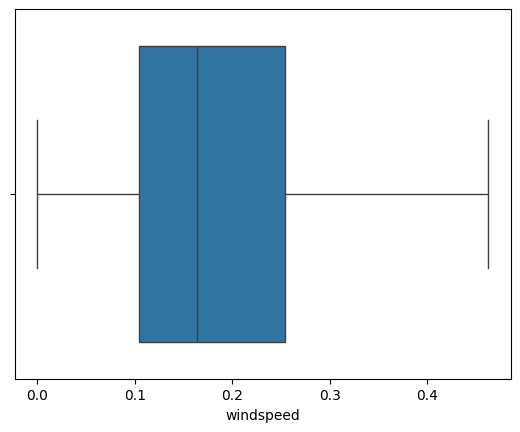

In [ ]:
sns.boxplot(x=hour_df['windspeed'])
plt.show()

In [ ]:
print(hour_df.groupby('hr')['cnt'].mean())


hr
0      53.998615
1      33.522949
2      22.916784
3      11.783745
4       6.414847
5      19.883427
6      76.019444
7     212.326446
8     360.026573
9     219.863572
10    174.725738
11    209.187675
12    255.171674
13    254.645480
14    243.987198
15    253.315264
16    313.170423
17    465.060993
18    429.478693
19    315.182841
20    227.967606
21    173.747899
22    132.149650
23     88.246537
Name: cnt, dtype: float64


In [ ]:
hour_df.describe()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt,dteday_num
count,17037,17037.000000,17037.000000,17037.000000,17037.000000,17037.000000,17037.000000,17037.000000,17037.000000,17037.000000,17037.000000,17037.000000,17037.000000,17037.000000,17037.000000,17037.000000
mean,2012-01-03 01:05:04.912836864,2.514527,0.502377,6.568469,11.504490,0.028878,2.999237,0.683160,1.424136,0.498097,0.630183,0.182893,35.742560,153.889887,189.632447,367.045196
min,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2011-07-06 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.480000,0.104500,4.000000,34.000000,40.000000,186.000000
50%,2012-01-02 00:00:00,3.000000,1.000000,7.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.630000,0.164200,17.000000,115.000000,142.000000,366.000000
75%,2012-07-03 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.790000,0.253700,48.000000,220.000000,282.000000,549.000000
max,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,0.462700,367.000000,886.000000,977.000000,730.000000
std,NaN,1.104051,0.500009,3.428002,6.933373,0.167469,2.004266,0.465258,0.637024,0.192695,0.191664,0.111995,49.403231,151.657363,181.742645,209.883933


In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17037 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17037 non-null  datetime64[ns]
 1   season      17037 non-null  int64         
 2   yr          17037 non-null  int64         
 3   mnth        17037 non-null  int64         
 4   hr          17037 non-null  int64         
 5   holiday     17037 non-null  int64         
 6   weekday     17037 non-null  int64         
 7   workingday  17037 non-null  int64         
 8   weathersit  17037 non-null  int64         
 9   temp        17037 non-null  float64       
 10  hum         17037 non-null  float64       
 11  windspeed   17037 non-null  float64       
 12  casual      17037 non-null  int64         
 13  registered  17037 non-null  int64         
 14  cnt         17037 non-null  int64         
 15  dteday_num  17037 non-null  int64         
dtypes: datetime64[ns](1), float

In [ ]:
hour_df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt,dteday_num
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.81,0.0,3,13,16,0
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.80,0.0,8,32,40,0
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.80,0.0,5,27,32,0
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.75,0.0,3,10,13,0
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.75,0.0,0,1,1,0


## Exploratory Data Analysis (EDA)

In [ ]:
day_df.describe(include="all")

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
count,718,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000
mean,2012-01-01 08:45:27.576601600,2.511142,0.498607,6.557103,0.029248,2.997214,0.685237,1.398329,0.497214,0.630683,0.186392,855.814763,3671.583565,4527.398329
min,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-03 06:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.338125,0.524583,0.134331,317.250000,2517.250000,3206.500000
50%,2011-12-30 12:00:00,3.000000,0.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.504655,0.630833,0.178802,725.500000,3676.500000,4566.500000
75%,2012-07-02 18:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.656667,0.732813,0.230724,1119.500000,4805.500000,6021.250000
max,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.972500,0.378108,3410.000000,6946.000000,8714.000000
std,NaN,1.106221,0.500347,3.439284,0.168618,2.000695,0.464745,0.546420,0.183533,0.141107,0.071791,689.457718,1560.879937,1937.695290


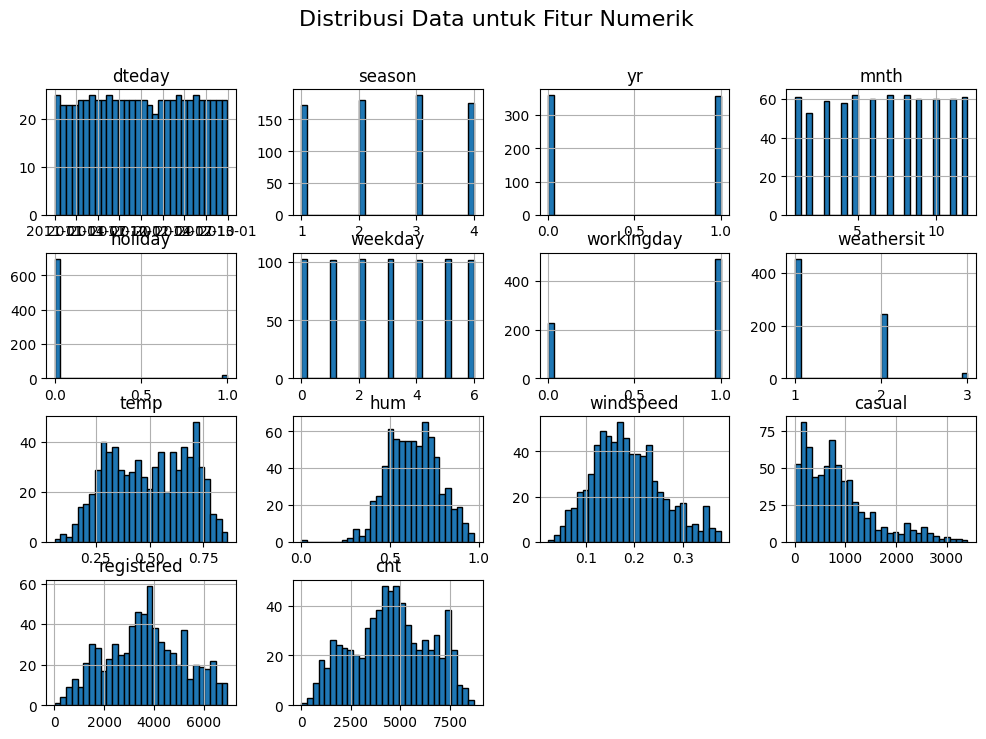

In [ ]:
day_df.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Distribusi Data untuk Fitur Numerik", fontsize=16)
plt.show()

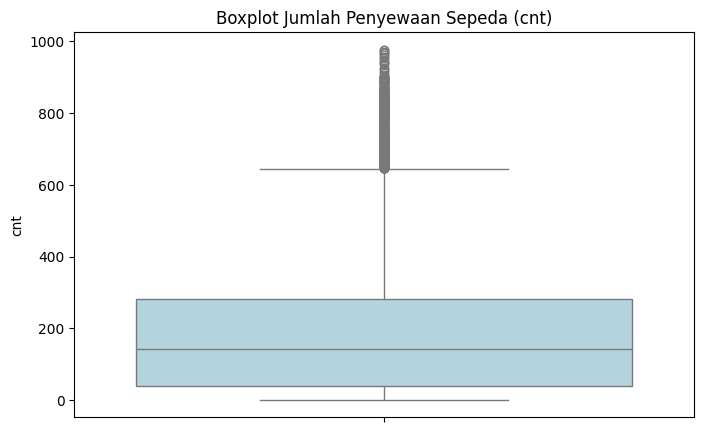

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(y=hour_df['cnt'], color="lightblue")
plt.title("Boxplot Jumlah Penyewaan Sepeda (cnt)")
plt.show()


## Visualization & Explanatory Analysis

### Pertanyaan 1:
Apakah penyewaan sepeda lebih tinggi saat cuaca cerah ?


<ipython-input-52-1e650bc7306e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=hour_df, palette="coolwarm")


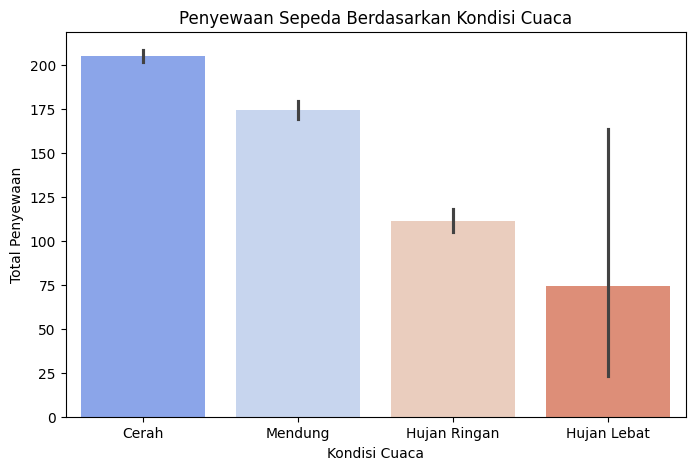

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='weathersit', y='cnt', data=hour_df, palette="coolwarm")
plt.title("Penyewaan Sepeda Berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Total Penyewaan")
plt.xticks(ticks=[0,1,2,3], labels=["Cerah", "Mendung", "Hujan Ringan", "Hujan Lebat"])
plt.show()

### Pertanyaan 2:
Penyewaan sepeda berdasarkan hari kerja dan weekend

<ipython-input-53-43e7e0facb12>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='workingday', y='cnt', data=hour_df, palette="pastel")


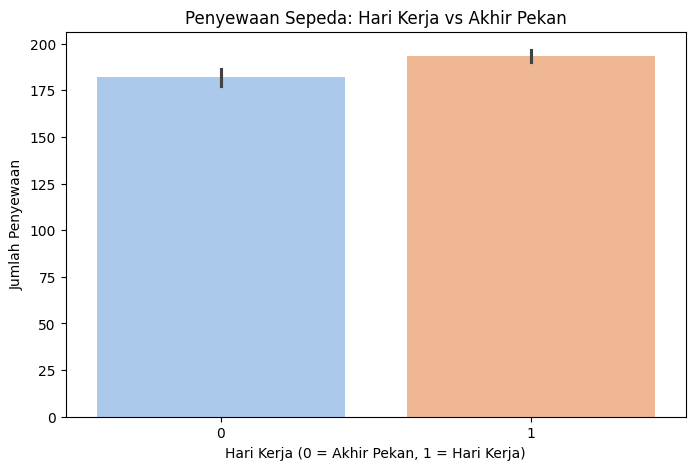

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='workingday', y='cnt', data=hour_df, palette="pastel")
plt.title("Penyewaan Sepeda: Hari Kerja vs Akhir Pekan")
plt.xlabel("Hari Kerja (0 = Akhir Pekan, 1 = Hari Kerja)")
plt.ylabel("Jumlah Penyewaan")
plt.show()

<ipython-input-54-6236af822cd7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hr', y='cnt', data=hour_df, estimator=sum, palette="Blues")


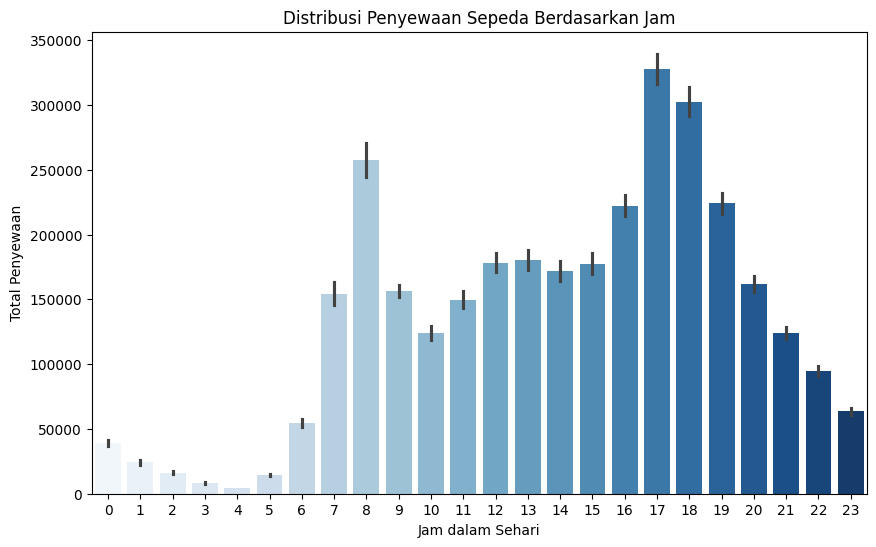

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='hr', y='cnt', data=hour_df, estimator=sum, palette="Blues")
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Jam")
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Total Penyewaan")
plt.show()

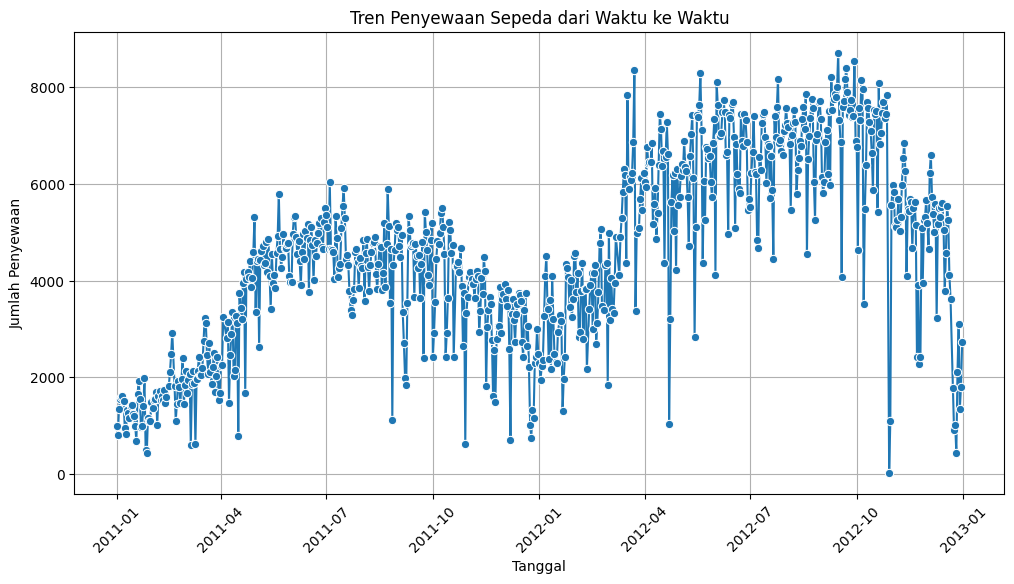

In [ ]:
# Jika tersedia dataset dengan agregasi harian
day_df.set_index('dteday', inplace=True)

# Membuat visualisasi tren harian
plt.figure(figsize=(12, 6))
sns.lineplot(x=day_df.index, y=day_df['cnt'], marker='o')

plt.title("Tren Penyewaan Sepeda dari Waktu ke Waktu")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Penyewaan")
plt.xticks(rotation=45)
plt.grid(True)

plt.show()


**Insight**

1.   tren penyewaan sepeda dari waktu ke waktu dari rentang tahun 2011 - 2013


## Analisis Lanjutan (Opsional)

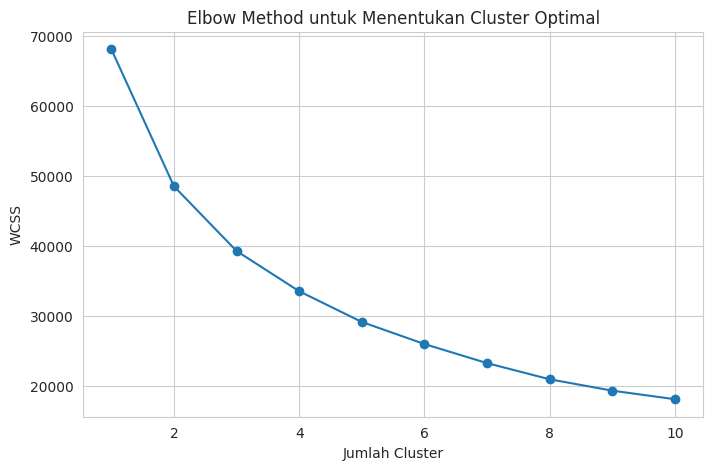

In [79]:
features = ['hr', 'cnt', 'temp', 'weekday']
data = hour_df[features].copy()

#normalisasi
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

wcss = []  # Within-Cluster Sum of Squares
for i in range(1, 11):  # Uji jumlah cluster dari 1 sampai 10
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot hasil Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.title('Elbow Method untuk Menentukan Cluster Optimal')
plt.show()
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
hour_df['Cluster'] = kmeans.fit_predict(data_scaled)

## Conclusion

1.  Dapat ditarik kesimpulan distribusi penyewaan sepeda berdasarkan bulan dan musim mengalami naik turun, ketika cuaca cerah  jumlah penyewaan sepeda tinggi sejalan dengan hasil dari tren penyewaan sepeda dari waktu ke waktu dimana pada bulan - bulan tertentu penyewaan sepeda terjadi kenaikan seperti diawal tahun dan terjadi penurunan ketika masuk ke akhir tahun.

2. Tren penyewaan sepeda dari waktu ke waktu terjadi peningkatan signifikan terlihat pada tahun 2011 - 2012, hal ini mengindikasikan popularitas penyewaan sepeda atau faktor lain seperti cuaca.